# Pandas Data Analysis 


In [1]:
# Import modules used in data science
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
# Import data from csv, need double backslashes due to system...
impt = pd.read_csv("C:\\Users\\Zen\\Documents\\PracticeData\\FilteredSalesData.csv")
impt.columns


Index(['Order_Date', 'OrderId', 'Item_ID', 'Item', 'Qty_Sold', 'Actual Price',
       'Discount Price', 'Discount', 'Date_Shipd', 'Time_Shipd', 'Loc_ID',
       'City', 'Country', 'Region', 'Sales_ID', 'SalesPerson'],
      dtype='object')

In [3]:
impt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199 entries, 0 to 198
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Order_Date      199 non-null    object
 1   OrderId         199 non-null    object
 2   Item_ID         199 non-null    object
 3   Item            199 non-null    object
 4   Qty_Sold        199 non-null    int64 
 5   Actual Price    199 non-null    int64 
 6   Discount Price  199 non-null    int64 
 7   Discount        199 non-null    object
 8   Date_Shipd      199 non-null    object
 9   Time_Shipd      199 non-null    object
 10  Loc_ID          199 non-null    object
 11  City            199 non-null    object
 12  Country         199 non-null    object
 13  Region          171 non-null    object
 14  Sales_ID        199 non-null    object
 15  SalesPerson     199 non-null    object
dtypes: int64(3), object(13)
memory usage: 25.0+ KB


In [4]:
# Convert Column to datetime to get ready to set x axis
impt['Order_Date']= pd.to_datetime(impt['Order_Date'])
impt.dtypes

Order_Date        datetime64[ns]
OrderId                   object
Item_ID                   object
Item                      object
Qty_Sold                   int64
Actual Price               int64
Discount Price             int64
Discount                  object
Date_Shipd                object
Time_Shipd                object
Loc_ID                    object
City                      object
Country                   object
Region                    object
Sales_ID                  object
SalesPerson               object
dtype: object

In [5]:
# Changes the x axis of the data frame
impt.set_index("Order_Date",inplace=True,)
impt

,OrderId,Item_ID,Item,Qty_Sold,Actual Price,Discount Price,Discount,Date_Shipd,Time_Shipd,Loc_ID,City,Country,Region,Sales_ID,SalesPerson
Order_Date,,,,,,,,,,,,,,,
2013-11-11,I-1092,I-07,Washing Machine,34,800,712,11.00%,1/3/2014,7:17:48 PM,L-39,Buenos Aires,Argentina,LATAM,S-86,Abdul Heywood
2013-12-15,I-1164,I-04,Toaster,43,50,40,20.00%,1/26/2014,2:09:38 PM,L-26,Kansas City,USA,NaN,S-29,Robert Arnold
2013-12-26,I-1184,I-04,Toaster,87,50,44,12.00%,1/2/2014,10:50:08 PM,L-32,Warsaw,Poland,EMEA,S-149,Anthony Connolly
2014-01-15,I-1019,I-03,Ceiling fan,53,150,150,0.00%,3/11/2014,12:30:47 AM,L-02,Toronto,Canada,NaN,S-18,Robin Hall
2014-01-16,I-1133,I-11,Vacuum Cleaner,94,250,175,30.00%,2/8/2014,1:38:30 PM,L-30,Los Angeles,USA,NaN,S-116,Chandrakant Atkins
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-10-03,I-1015,I-07,Washing Machine,55,800,672,16.00%,11/12/2018,9:29:26 AM,L-05,Sydney,Australia,APAC,S-14,Alen Dinan
2018-10-06,I-1023,I-10,Coffee grinder,34,70,67,4.30%,11/13/2018,2:30:16 AM,L-19,Bangalore,India,APAC,S-22,Philip Dewar
2018-10-07,I-1197,I-01,Microwave,82,80,78,2.50%,11/30/2018,12:15:25 AM,L-17,Prague,Czech Republic,EMEA,S-156,Gary Shaw


<Axes: title={'center': 'Qty Sold By Year'}, xlabel='Year', ylabel='Units'>

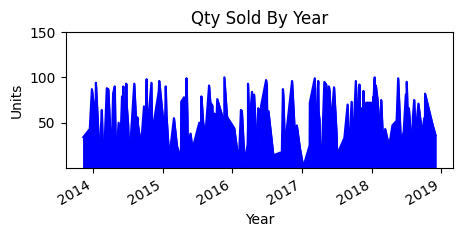

In [6]:
# New chart after assigning datetime data type.
impt.resample("YE")
impt.plot(legend=False,xlabel='Year',ylabel='Units',y=[3],kind='area',figsize=(5,2),title='Qty Sold By Year',style=["blue"],yticks=[50,100,150])

In [7]:
# Salesperson stats assigned to variable
salesdf = impt.groupby(by='SalesPerson').describe()
salesdf

Qty_Sold                                                  \
                      count       mean        std   min    25%   50%    75%   
SalesPerson                                                                   
Abdul Heywood          22.0  47.727273  26.273619   2.0  28.00  46.5  68.25   
Alen Dinan             22.0  48.454545  29.902584   1.0  26.25  49.5  72.00   
Anthony Connolly       22.0  42.863636  27.485573  11.0  18.00  37.5  61.25   
Chandrakant Atkins     22.0  51.409091  30.123016   2.0  26.00  48.5  80.75   
Gary Shaw              22.0  52.409091  28.319031   8.0  27.00  55.0  74.00   
Nicholas Holloway       1.0  36.000000        NaN  36.0  36.00  36.0  36.00   
Philip Dewar           22.0  55.863636  29.399215   6.0  34.50  52.0  83.25   
Robert Arnold          22.0  66.818182  27.109366  15.0  43.50  75.5  89.50   
Robin Hall             22.0  51.363636  28.469776   1.0  28.75  54.0  70.50   
Ronald Butler          22.0  41.681818  27.568765   1.0  18.25  43.0  56.00   

                          Actual Price              ...                 \
                      max        count        mean  ...    75%     max   
SalesPerson                                         ...                  
Abdul Heywood        90.0         22.0  284.545455  ...  650.0  1000.0   
Alen Dinan           99.0         22.0  313.636364  ...  500.0  1000.0   
Anthony Connolly     93.0         22.0  415.454545  ...  650.0  1000.0   
Chandrakant Atkins   95.0         22.0  335.000000  ...  500.0  1000.0   
Gary Shaw            99.0         22.0  166.818182  ...  132.5   800.0   
Nicholas Holloway    36.0          1.0  800.000000  ...  800.0   800.0   
Philip Dewar         99.0         22.0  460.909091  ...  800.0  1000.0   
Robert Arnold       100.0         22.0  299.545455  ...  650.0  1000.0   
Robin Hall           96.0         22.0  294.090909  ...  500.0   700.0   
Ronald Butler        96.0         22.0  280.000000  ...  500.0  1000.0   

                   Discount Price                                         \
                            count        mean         std    min     25%   
SalesPerson                                                                
Abdul Heywood                22.0  249.590909  306.788536   22.0   29.00   
Alen Dinan                   22.0  252.590909  272.862194   26.0   45.25   
Anthony Connolly             22.0  376.272727  325.739332   26.0   52.50   
Chandrakant Atkins           22.0  279.318182  277.755526   28.0   65.25   
Gary Shaw                    22.0  145.045455  182.450118   23.0   45.50   
Nicholas Holloway             1.0  584.000000         NaN  584.0  584.00   
Philip Dewar                 22.0  351.500000  274.834106   28.0   64.75   
Robert Arnold                22.0  262.454545  288.518668   26.0   37.00   
Robin Hall                   22.0  285.363636  223.871040   27.0   83.25   
Ronald Butler                22.0  266.863636  308.167131   24.0   52.75   

                                          
                      50%     75%    max  
SalesPerson                               
Abdul Heywood        56.0  572.25  784.0  
Alen Dinan           78.0  490.00  910.0  
Anthony Connolly    277.5  611.00  970.0  
Chandrakant Atkins  147.0  497.50  880.0  
Gary Shaw            71.0  129.25  686.0  
Nicholas Holloway   584.0  584.00  584.0  
Philip Dewar        465.0  515.00  810.0  
Robert Arnold        76.0  571.25  736.0  
Robin Hall          196.5  490.00  693.0  
Ronald Butler       108.5  493.75  990.0  

[10 rows x 24 columns]

<Axes: title={'center': 'Sales Person'}, ylabel='SalesPerson'>

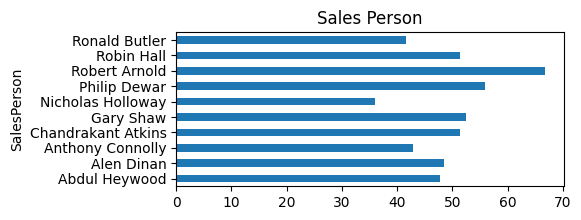

In [8]:
# New plot for salesdf
salesdf.plot(kind='barh',y=[1],title='Sales Person',legend= False,figsize=(5,2),style=["red"])

In [9]:
# Salesperson stats assigned to variable
salesdf = impt.groupby(by='SalesPerson').sum()
salesdf.sort_values(by='Actual Price',inplace=True)
salesdf['Actual Price']


SalesPerson
Nicholas Holloway       800
Gary Shaw              3670
Ronald Butler          6160
Abdul Heywood          6260
Robin Hall             6470
Robert Arnold          6590
Alen Dinan             6900
Chandrakant Atkins     7370
Anthony Connolly       9140
Philip Dewar          10140
Name: Actual Price, dtype: int64

<Axes: ylabel='SalesPerson'>

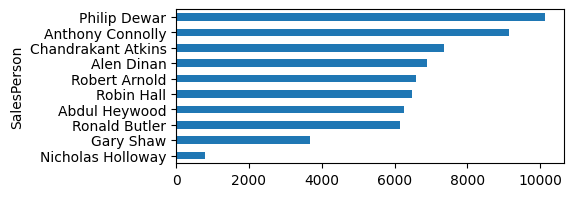

In [10]:
# Salesperson with the highest sales plotted
salesdf['Actual Price'].plot(kind='barh',figsize=(5,2),style=['purple'])

In [11]:
# Count of items sold by data
itemdf = impt.groupby(by='Item').sum()
itemdf.sort_values(by='Item')
itemdf['Qty_Sold'].sort_values(axis=0)


Item
Dishwasher          478
Washing Machine     690
Coffee grinder      713
Ceiling fan         726
Air conditioner     727
Blender             795
Toaster             798
Refrigerator        817
Vacuum Cleaner      829
Oven                975
Microwave          1099
Iron               1478
Name: Qty_Sold, dtype: int64

<Axes: ylabel='Item'>

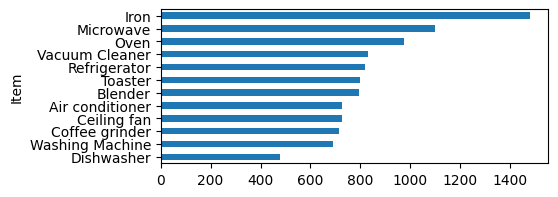

In [12]:
itemdf['Qty_Sold'].sort_values(axis=0).plot(kind='barh',figsize=(5,2))

<Axes: >

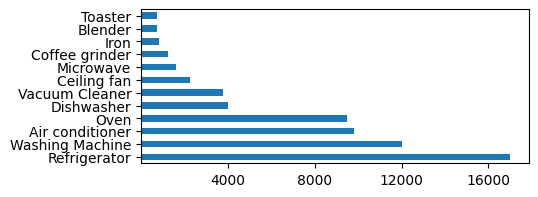

In [13]:
# Sum of totsal sales y item
itemdf['Actual Price'].sort_values(axis=0,ascending=False).plot(kind='barh',figsize=(5,2),ylabel="",xticks=[4000,8000,12000,16000])

<Axes: xlabel='Region'>

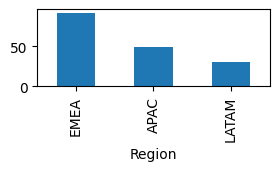

In [14]:
# Group regional sales with plot
dfregion = impt.groupby(by='Region').count()
dfregion.sort_values(by=['Qty_Sold'],ascending=False,inplace=True)
dfregion['Qty_Sold'].plot(kind='bar',figsize=(3,1),)

In [15]:
# Convert date and time columns for analysis
impt['Date_Shipd']= pd.to_datetime(impt['Date_Shipd'])
impt['Time_Shipd']= pd.to_datetime(impt['Time_Shipd'])
# Get time after changing column data type
impt['Time_Shipd']= impt['Time_Shipd'].dt.time

C:\Users\Zen\AppData\Local\Temp\ipykernel_7768\2544143650.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  impt['Time_Shipd']= pd.to_datetime(impt['Time_Shipd'])


In [16]:
# Post converted columns
dfshipped =impt[['Date_Shipd','Time_Shipd']]
dfshipped

,Date_Shipd,Time_Shipd
Order_Date,,
2013-11-11,2014-01-03,19:17:48
2013-12-15,2014-01-26,14:09:38
2013-12-26,2014-01-02,22:50:08
2014-01-15,2014-03-11,00:30:47
2014-01-16,2014-02-08,13:38:30
...,...,...
2018-10-03,2018-11-12,09:29:26
2018-10-06,2018-11-13,02:30:16
2018-10-07,2018-11-30,00:15:25


In [17]:
dfshipped['Days_Prod']= dfshipped['Date_Shipd']-dfshipped.index
dfshipped.sort_values(by='Days_Prod',ascending=False,inplace=True)
dfshipped

C:\Users\Zen\AppData\Local\Temp\ipykernel_7768\1946439529.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfshipped['Days_Prod']= dfshipped['Date_Shipd']-dfshipped.index
C:\Users\Zen\AppData\Local\Temp\ipykernel_7768\1946439529.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfshipped.sort_values(by='Days_Prod',ascending=False,inplace=True)


,Date_Shipd,Time_Shipd,Days_Prod
Order_Date,,,
2018-05-08,2018-07-07,00:27:17,60 days
2018-05-06,2018-07-05,12:11:33,60 days
2017-02-10,2017-04-11,07:03:14,60 days
2015-07-22,2015-09-19,10:50:20,59 days
2016-12-20,2017-02-17,18:14:30,59 days
...,...,...,...
2018-11-15,2018-11-23,14:34:46,8 days
2018-01-08,2018-01-16,03:20:33,8 days
2018-08-11,2018-08-18,21:02:52,7 days


<Axes: ylabel='Order_Date'>

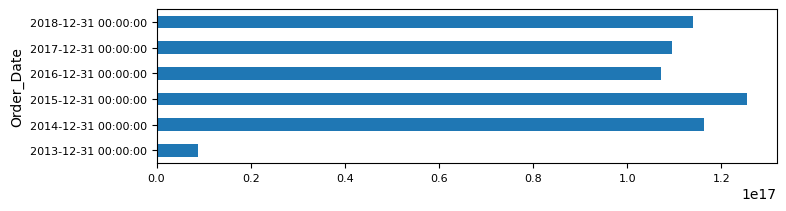

In [18]:
dmm= dfshipped['Days_Prod'].resample(rule="YE-DEC").sum()
dmm.plot(kind='barh',figsize=(8,2),fontsize=8)

<Axes: title={'center': 'Sale By Region'}, xlabel='Qty Sold', ylabel='Region'>

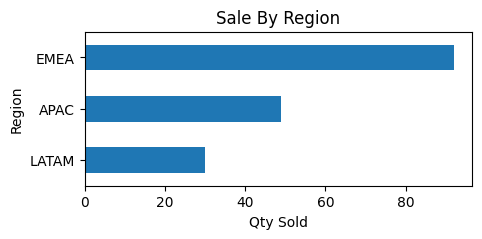

In [19]:
dfregion["Qty_Sold"].sort_values(ascending=True).plot(kind='barh',figsize=(5,2),layout=[3,2],title="Sale By Region",grid=False,ylabel="Region",xlabel="Qty Sold")

In [20]:
impt.pivot_table(impt,index=['Country'],columns='Item',aggfunc='count',dropna=True,margins=False)

Actual Price                                                \
Item           Air conditioner Blender Ceiling fan Coffee grinder Dishwasher   
Country                                                                        
Argentina                  NaN     NaN         NaN            NaN        NaN   
Australia                  NaN     NaN         NaN            NaN        NaN   
Austria                    NaN     NaN         NaN            NaN        NaN   
Brazil                     1.0     NaN         1.0            1.0        NaN   
Canada                     NaN     1.0         1.0            NaN        NaN   
Chile                      NaN     NaN         NaN            NaN        NaN   
China                      1.0     4.0         1.0            NaN        NaN   
Colombia                   1.0     NaN         NaN            1.0        NaN   
Czech Republic             NaN     NaN         1.0            NaN        NaN   
Egypt                      NaN     NaN         NaN            1.0        NaN   
France                     NaN     NaN         NaN            1.0        1.0   
Germany                    NaN     NaN         NaN            1.0        NaN   
Greece                     NaN     NaN         1.0            NaN        1.0   
India                      NaN     NaN         1.0            2.0        1.0   
Ireland                    2.0     1.0         NaN            NaN        NaN   
Israel                     1.0     4.0         NaN            2.0        NaN   
Italy                      NaN     2.0         NaN            1.0        NaN   
Japan                      NaN     NaN         1.0            2.0        NaN   
Malaysia                   NaN     NaN         1.0            1.0        NaN   
Mexico                     NaN     NaN         NaN            NaN        NaN   
Netherlands                NaN     NaN         1.0            NaN        NaN   
Peru                       NaN     NaN         NaN            1.0        1.0   
Poland                     1.0     NaN         NaN            NaN        1.0   
Romania                    NaN     NaN         1.0            NaN        1.0   
Russia                     1.0     NaN         NaN            NaN        NaN   
Saudi Arabia               NaN     1.0         NaN            1.0        NaN   
South Africa               NaN     NaN         NaN            NaN        NaN   
South Korea                NaN     NaN         NaN            NaN        NaN   
Spain                      1.0     NaN         1.0            NaN        1.0   
Thailand                   1.0     NaN         1.0            NaN        NaN   
Turkey                     1.0     NaN         1.0            NaN        1.0   
UAE                        1.0     NaN         NaN            NaN        NaN   
UK                         NaN     NaN         NaN            NaN        NaN   
USA                        2.0     2.0         2.0            2.0        NaN   
Vietnam                    NaN     NaN         NaN            1.0        NaN   

                                                         ...  Time_Shipd  \
Item           Iron Microwave Oven Refrigerator Toaster  ... Ceiling fan   
Country                                                  ...               
Argentina       1.0       NaN  NaN          1.0     NaN  ...         NaN   
Australia       2.0       NaN  NaN          1.0     1.0  ...         NaN   
Austria         NaN       NaN  NaN          1.0     1.0  ...         NaN   
Brazil          NaN       NaN  NaN          NaN     1.0  ...         1.0   
Canada          NaN       1.0  1.0          NaN     NaN  ...         1.0   
Chile           NaN       NaN  NaN          1.0     1.0  ...         NaN   
China           1.0       1.0  1.0          1.0     1.0  ...         1.0   
Colombia        2.0       NaN  NaN          NaN     NaN  ...         NaN   
Czech Republic  NaN       1.0  NaN          NaN     NaN  ...         1.0   
Egypt           1.0       NaN  NaN          1.0     1.0  ...     

In [ ]:
itemdf['Qty_Sold'].rank(pct=True,ascending=True)

Item
Air conditioner    0.416667
Blender            0.500000
Ceiling fan        0.333333
Coffee grinder     0.250000
Dishwasher         0.083333
Iron               1.000000
Microwave          0.916667
Oven               0.833333
Refrigerator       0.666667
Toaster            0.583333
Vacuum Cleaner     0.750000
Washing Machine    0.166667
Name: Qty_Sold, dtype: float64

<Axes: ylabel='Item'>

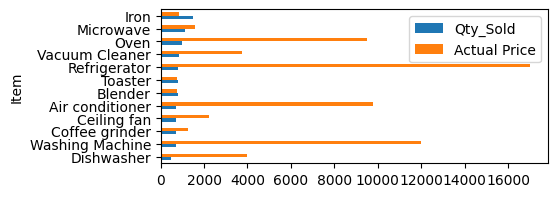

In [116]:
itemdf['sum'] = itemdf['Qty_Sold']*itemdf['Actual Price']
itemdf[['Qty_Sold','Actual Price']].sort_values(by='Qty_Sold',ascending=True).plot(kind='barh',figsize=(5,2))


In [164]:
impt.set_index('Country').groupby(by=['Country','Item']).count()

OrderId  Item_ID  Qty_Sold  Actual Price  \
Country   Item                                                        
Argentina Iron                   1        1         1             1   
          Refrigerator           1        1         1             1   
          Vacuum Cleaner         1        1         1             1   
          Washing Machine        1        1         1             1   
Australia Iron                   2        2         2             2   
...                            ...      ...       ...           ...   
USA       Vacuum Cleaner         2        2         2             2   
          Washing Machine        1        1         1             1   
Vietnam   Coffee grinder         1        1         1             1   
          Iron                   2        2         2             2   
          Microwave              1        1         1             1   

                           Discount Price  Discount  Date_Shipd  Time_Shipd  \
Country   Item                                                                
Argentina Iron                          1         1           1           1   
          Refrigerator                  1         1           1           1   
          Vacuum Cleaner                1         1           1           1   
          Washing Machine               1         1           1           1   
Australia Iron                          2         2           2           2   
...                                   ...       ...         ...         ...   
USA       Vacuum Cleaner                2         2           2           2   
          Washing Machine               1         1           1           1   
Vietnam   Coffee grinder                1         1           1           1   
          Iron                          2         2           2           2   
          Microwave                     1         1           1           1   

                           Loc_ID  City  Region  Sales_ID  SalesPerson  
Country   Item                                                          
Argentina Iron                  1     1       1         1            1  
          Refrigerator          1     1       1         1            1  
          Vacuum Cleaner        1     1       1         1            1  
          Washing Machine       1     1       1         1            1  
Australia Iron                  2     2       2         2            2  
...                           ...   ...     ...       ...          ...  
USA       Vacuum Cleaner        2     2       0         2            2  
          Washing Machine       1     1       0         1            1  
Vietnam   Coffee grinder        1     1       1         1            1  
          Iron                  2     2       2         2            2  
          Microwave             1     1       1         1            1  

[149 rows x 13 columns]